## Laboratorio 1: Control Óptimo

**Profesor:** Héctor Ramírez C. 

**Auxiliares:** Matías V. Vera y  S. Adrián Arellano

**Estudiante:** Maximiliano S. Lioi

In [3]:
import sympy as sp
import numpy as np
import pyplane
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

#### Guías de usuario

Sympy: https://docs.sympy.org/latest/index.html

Scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp

### Ejercicio 1 (Ecuaciones Diferenciales Ordinarias)

Dado el sistema de ecuaciones diferenciales no lineal 

$$\begin{cases}
\dot{x} = 3x - xy \\
\dot{y} = y + log(y)
\end{cases}$$

con condición inicial $(x0, y0) = (−5, 1)$, queremos describir su comportamiento para $t \in [0, 3]$.

#### **Parte a)**: Resolución mediante Sympy

In [43]:
# Definimos las funciones
t, C1, C2= sp.symbols("t C1 C2")
x = sp.Function("x")(t)
x_t = x.diff()
y = sp.Function("y")(t)
y_t = y.diff()
func = [x,y]

# Definimos el sistema de ecuaciones diferenciales
diff_eq1 = sp.Eq(x_t, 3*x - x*y)
diff_eq2 = sp.Eq(y_t, y + sp.log(y))
eq = [diff_eq1, diff_eq2]

# Resolvemos la ecuación diferencial sin condiciones iniciales
sol = sp.dsolve(eq, func)
x_sol = sp.Eq(x,sol[0].rhs)
y_sol = sp.Eq(y,sol[1].rhs)

In [44]:
#La solución para x(t) es
x_sol 

Eq(x(t), exp(C1 + exp(C2 + t) - 3))

In [45]:
#La solución para y(t) es
y_sol

Eq(y(t), C1 - log(exp(C1 + exp(C2 + t) - 3)))

$\textbf{Comentario:}$ Notamos que las condiciones iniciales $(x_0,y_0) = (-5, 1)$ son incompatibles con la solución entregada por Sympy, pues $x(t)$ es de forma exponencial y por tanto no puede ser nunca negativo, por otro lado, $y(t)$ depende de 2 constantes, siendo que la ecuación de $y(t)$ no depende de $x(t)$, pero se ve que simplificando se reduce a una sola constante.

Intentamos resolver la ecuación para $y(t)$

In [5]:
# Resolvemos para y(t) que no depende de x(t)
y_sol = sp.dsolve(diff_eq2, y)
y_sol

Eq(-Integral(1/(_y + log(_y)), (_y, y(t))), C1 - t)

$\textbf{Comentario}:$ No entrega una solución explicita, usando que $y(0) = 1$ se puede deducir que $C_1 = 0$ y entonces se tiene la relación

$$\int_{1}^{y(t)} \frac{1}{y+log(y)} dy = t$$

Intentamos resolver usando las condiciones iniciales añadiendo el método $\textit{ics}$ a la función $\textit{dsolve}$

<function _lambdifygenerated at 0x0000021A49FD2280>


<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in log
  return -log(-5*exp(2*exp(t) - 2)) + 1 + log(5) + 1j*pi
C:\Users\Maximiliano\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


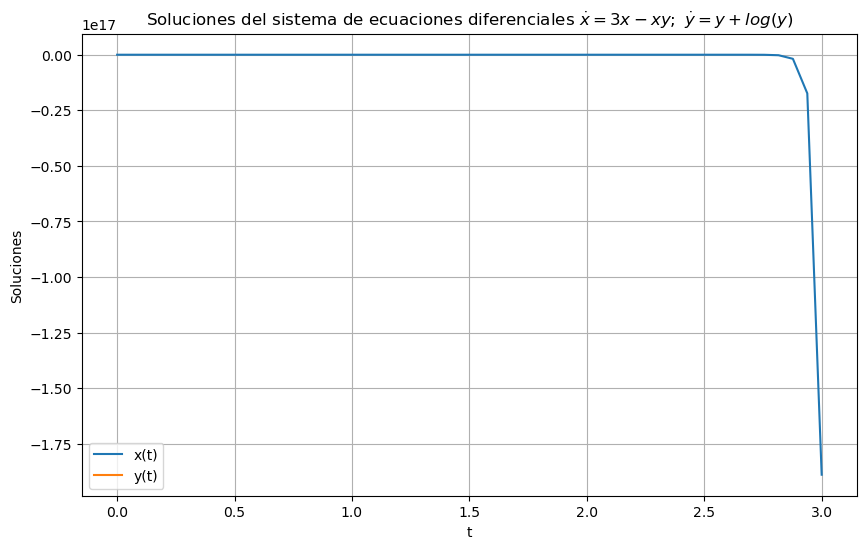

In [6]:
# Definimos las condiciones iniciales
initial_conditions = {x.subs(t,0): -5, y.subs(t,0): 1}

# Resolvemos la ecuación diferencial con condiciones iniciales
sol = sp.dsolve(eq, func, ics=initial_conditions)

# Recuperamos la expresión de la solución
x_sol = sol[0].rhs
y_sol = sol[1].rhs

# Expresamos la solución numéricamente
x_numeric = sp.lambdify(t, x_sol, 'numpy')
y_numeric = sp.lambdify(t, y_sol, 'numpy')
print(x_numeric)
# Discretizamos la solución en el intervalo [0,3]
time_vals = np.linspace(0, 3, 50)  # Intervalo de tiempo para la gráfica
x_vals = x_numeric(time_vals)
y_vals = y_numeric(time_vals)

# Graficamos mediante matplotlib
plt.figure(figsize=(10, 6))
plt.plot(time_vals, x_vals, label='x(t)')
plt.plot(time_vals, y_vals, label='y(t)')
plt.xlabel('t')
plt.ylabel('Soluciones')
plt.title(r'Soluciones del sistema de ecuaciones diferenciales $\dot{x} = 3x - xy  ; \ \dot{y} = y + log(y)$')
plt.legend()
plt.grid(True)
plt.show()

$\textbf{Comentario:}$ El código nos arroja error debido a que las soluciones $x(t),y(t)$ toman valores en $\mathbb{C}$

#### **Parte b):** Resolución mediante Scipy

In [5]:
import scipy as sp
from scipy.integrate import solve_ivp

In [8]:
# Resolvemos el sistema usando solve_ivp de scipy
# Condiciones iniciales (x0,y0) = (-5,1)

# Definimos el lado derecho de la ecuación z'(t) = f(t, z)
def diff_eq(t, z):
    x, y = z
    return np.array([3*x - x*y, y + np.log(y)])

# Definimos las condiciones iniciales
t_span = np.array([0,3])
z0 = np.array([-5,1])

# Resolvemos el sistema de ecuaciones diferenciales
diff_eq_sol = solve_ivp(diff_eq, t_span, z0, dense_output = True)

In [9]:
diff_eq_sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 158
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000021A4A21F7C0>
   status: 0
  success: True
        t: array([0.        , 0.08299338, 0.67074742, 0.96309346, 1.2554395 ,
       1.68171427, 1.78934588, 1.89697749, 1.99955282, 2.08875321,
       2.16740938, 2.24606555, 2.31694524, 2.3813791 , 2.44196281,
       2.50168475, 2.56408648, 2.63287278, 2.71206524, 2.8068817 ,
       2.92257544, 3.        ])
 t_events: None
        y: array([[-5.00000000e+00, -5.88133738e+00, -1.34507268e+01,
        -1.42092490e+01, -1.00627806e+01, -2.03399964e+00,
        -1.02805077e+00, -4.50765489e-01, -1.77137357e-01,
        -6.89511872e-02, -2.68361846e-02, -9.32673662e-03,
        -3.23674693e-03, -1.12580697e-03, -3.82286452e-04,
        -1.20819339e-04, -3.29892937e-05, -7.14870424e-06,
        -1.25087607e-06, -3.86466526e-07, -7.66285723e-07,
        -2.8472

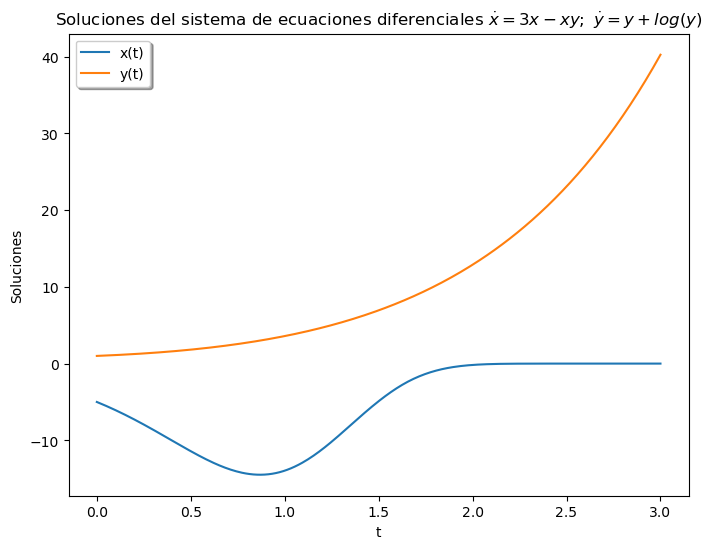

In [10]:
# Graficamos las soluciones
t_lins = np.linspace(0, 3, 300)
z = diff_eq_sol.sol(t_lins)
plt.figure(figsize=(8, 6))
plt.plot(t_lins, z.T)
plt.xlabel('t')
plt.ylabel('Soluciones')
plt.legend(['x(t)', 'y(t)'], shadow=True)
plt.title('Soluciones del sistema de ecuaciones diferenciales $\dot{x} = 3x - xy  ; \ \dot{y} = y + log(y)$')
plt.show()

#### **Parte c):** Resolución mediante PyPlane

Luego de instalar PyPlane, se procede a simular la ecuación con condiciones iniciales $(x_0, y_0) = (-5,1)$, se obtienen los mismos resultados que la solución entregada por Scipy 

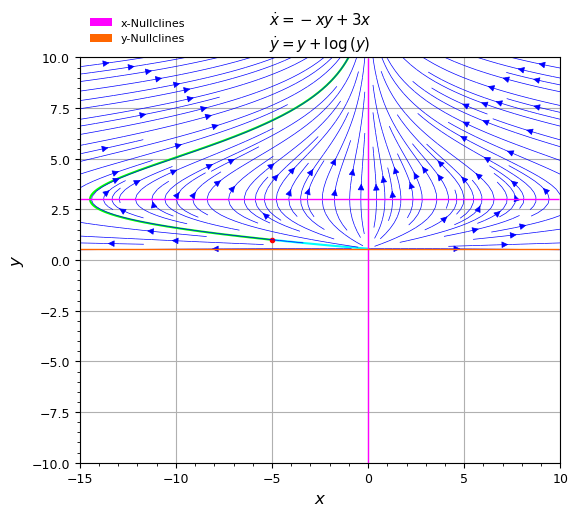

In [11]:
from IPython import display
# Condiciones iniciales (x0,y0) = (-5,1)
# Diagrama de Fases
display.Image("pyplane_img/img1_pp.png")

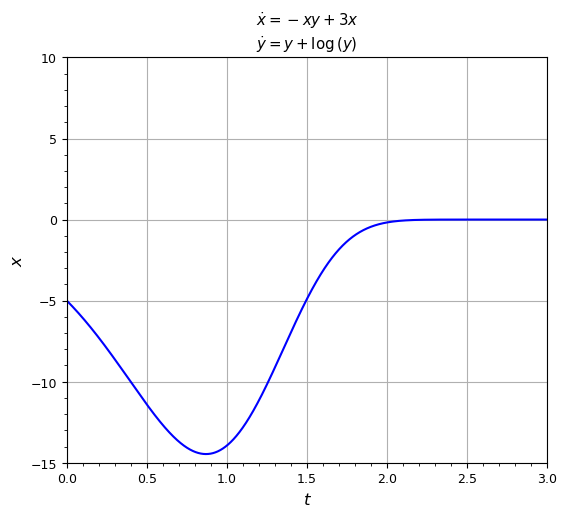

In [12]:
# Solución para x(t)
display.Image("pyplane_img/img1_x.png")

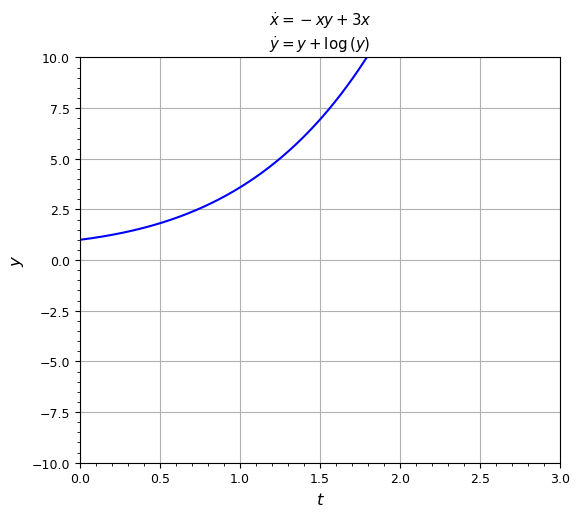

In [13]:
#Solución para y(t)
display.Image("pyplane_img/img1_y.png")

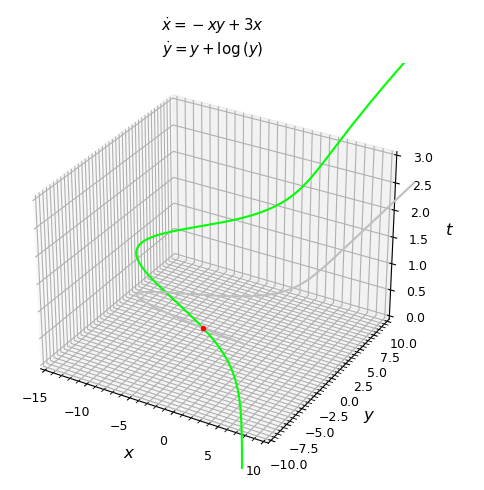

In [14]:
#Solución t(x,y)
display.Image("pyplane_img/img1_3d.PNG")

**Comentario:** Se obtienen las mismas soluciones para $(x(t),y(t))$ con condición inicial $(x_0,y_0) = (-5,1)$ utilizando PyPlane que aquellas obtenidas por Scipy.

Procedemos a resolver la ecuación diferencial para 10 condiciones iniciales distintas

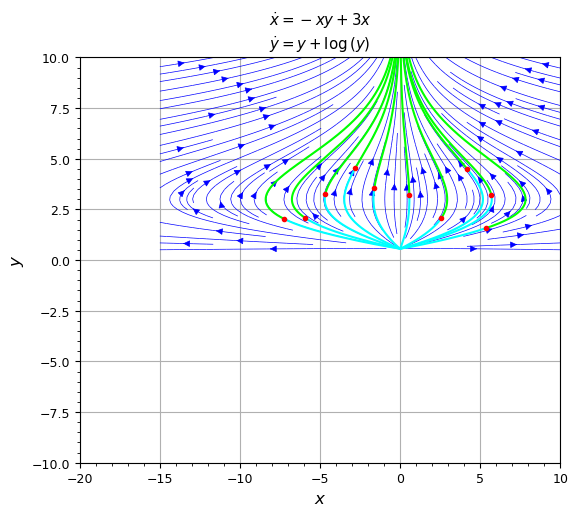

In [15]:
# Diagrama de Fases
display.Image("pyplane_img/img2_pp.png")

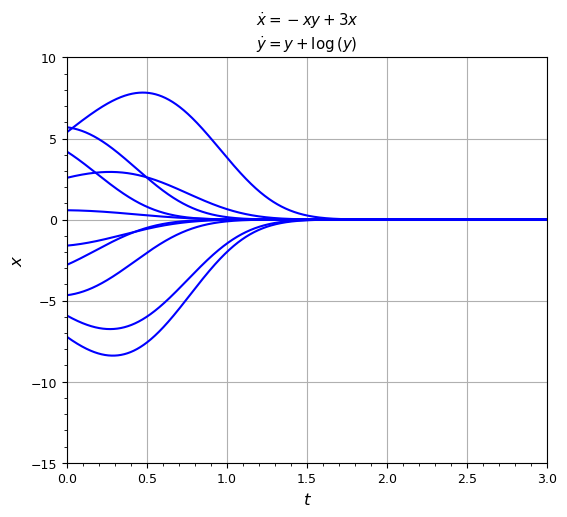

In [16]:
# Soluciones para x(t)
display.Image("pyplane_img/img2_x.png")

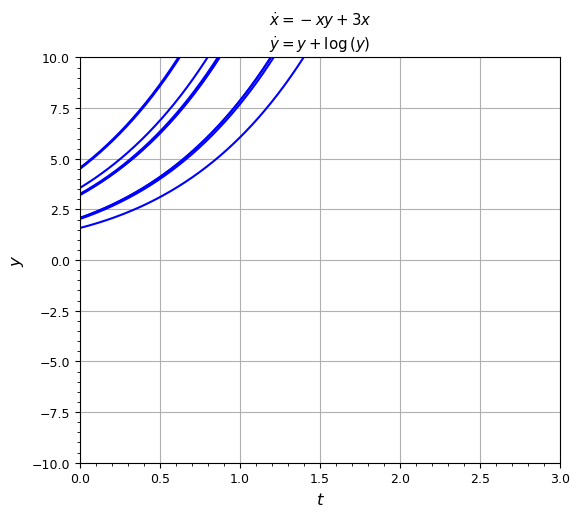

In [17]:
# Soluciones para y(t)
display.Image("pyplane_img/img2_y.png")

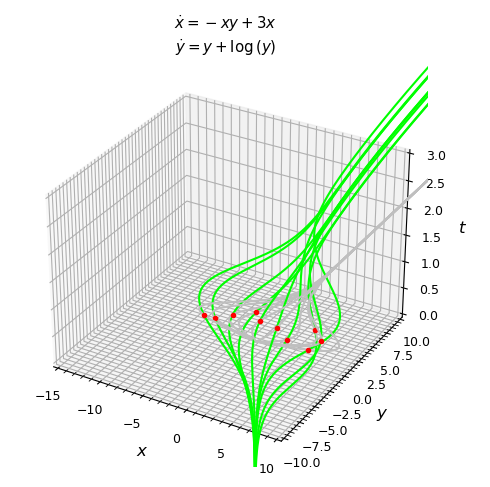

In [18]:
# Soluciones t(x,y)
display.Image("pyplane_img/img2_3d.PNG")

#### **Parte d):** Conclusiones

A lo largo del ejercicio buscamos resolver el sistema de ecuaciones diferenciales 
$$\begin{cases}
\dot{x} = 3x - xy \\
\dot{y} = y + log(y)
\end{cases}$$

Para ello hacemos uso de 3 herramientas distintas: ***Sympy, Scipy, y PyPlane***

Respecto a ***Sympy***, no se logran obtener soluciones para la ecuación diferencial, pues al tratar el sistema de ecuaciones de manera conjunta entrega soluciones infactibles, por lo demás, cuando intenta resolverse la ecuación solo para $y(t)$ que es independiente de $x(t)$, entrega una expresión implícita de la solución
$$\int_{1}^{y(t)} \frac{1}{y+log(y)} dy = t$$
Podemos decir que la ecuación no fue resuelta mediante esta librería

En cuanto a ***Scipy***,  se logra resolver la ecuación diferencial mediante la función ***solve_ivp***, sin embargo, a diferencia de ***Sympy***, la solución se entrega de manera numérica mientras que ***Sympy*** entrega una formula para las soluciones.

Finalmente se hace uso de ***PyPlane***, se clona el repositorio y se instala mediante ***Anaconda Prompt*** accediendo a la carpeta del repositorio y escribiendo el comando ***pip install .*** para luego ejecutar el programa escribiendo el comando ***python run_pyplane.py***.

Se escribe el sistema de ecuaciones con condiciones iniciales $(x_0,y_0)=(-5,1)$ y se obtienen las mismas soluciones que aquellas obtenidas mediante ***Scipy***. Por lo demás, se prueban otras 10 condiciones iniciales distintas, estudiando los diagramas de fase y las soluciones para $(x(t),y(t))$ y $t(x,y)$

### Ejercicio 2 (Sistemas Dinámicos Controlados) 
Considere el sistema de control en $\mathbb{R}$
$$
\dot{x}(t)=A x(t)+B u(t) \quad \text { con } \quad A=\left(\begin{array}{ccc}
1 & 2 & 2 \\
-5 & 3 & 4 \\
0 & 2 & 0
\end{array}\right), \quad B=\left(\begin{array}{l}
2 \\
0 \\
1
\end{array}\right)
$$
con condiciones iniciales $x_0=(0,0,0)$. Resuelva el sistema de forma numérica en el intervalo de tiempo $[0,1]$ en Python mediante solve_ivp para los siguientes controles de lazo abierto (open loop):
$$
u(t)=0 ; \quad u(t)=1 ; \quad u(t)=-\cos (t) ; \quad u(t)=t^2 .
$$

In [9]:
# Definir las matrices A y B
A = np.array([[1, 2, 2], [-5, 3, 4], [0, 2, 0]])
B = np.array([2, 0, 1]).transpose()

# Definimos los controles a utilizar
def u1_control(t):
    return 0
def u2_control(t):
    return 1
def u3_control(t):
    return -np.cos(t)
def u4_control(t):
    return t**2

# Escribimos el sistema de ecuaciones diferenciales

def system_dynamics_u(u):
    def system_dynamics(t, X):
        return np.dot(A, X) + np.dot(B, u(t))
    return system_dynamics

# Condiciones iniciales
t_span2 = np.array([0,1])
x_0 = np.array([0, 0, 0])

# Resolvemos el sistema controlado para u_1
diff_sol_u1 = solve_ivp(system_dynamics_u(u1_control), t_span2, x_0, dense_output=True)
diff_sol_u2 = solve_ivp(system_dynamics_u(u2_control), t_span2, x_0, dense_output=True)
diff_sol_u3 = solve_ivp(system_dynamics_u(u3_control), t_span2, x_0, dense_output=True)
diff_sol_u4 = solve_ivp(system_dynamics_u(u4_control), t_span2, x_0, dense_output=True)

In [10]:
#Funciones auxiliares (debugg)
def u1(linspace_array):
    u1 = np.array([0] * len(linspace_array))
    return u1

def u2(linspace_array):
    u1 = np.array([1] * len(linspace_array))
    return u1

# Función para graficar
def grafica_soluciones(diff_eq_solucion, control):
    t = np.linspace(0, 1, 300)
    x = diff_eq_solucion.sol(t)
    u_control = control(t)
    plt.figure(figsize=(8, 6))
    plt.plot(t, x.T)
    plt.plot(t, u_control)
    plt.xlabel('t')
    plt.ylabel('Soluciones')
    plt.legend(['x(t)', 'y(t)', 'z(t)', 'u(t)'], shadow=True)
    plt.title('Soluciones del sistema controlado')
    plt.show()
    
# Función para graficar trayectorias en 3D
def grafica_trayectorias(diff_eq_solucion):
    t = np.linspace(0, 1, 300)
    x = diff_eq_solucion.sol(t)
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    x_traj = x[0, :]
    y_traj = x[1, :]
    z_traj = x[2, :]
    
    ax.plot(x_traj, y_traj, z_traj, label='Trayectoria')
    ax.set_xlabel('X(t)')
    ax.set_ylabel('Y(t)')
    ax.set_zlabel('Z(t)')
    ax.legend()
    ax.set_title('Trayectoria en 3D del sistema controlado')
    
    plt.show()

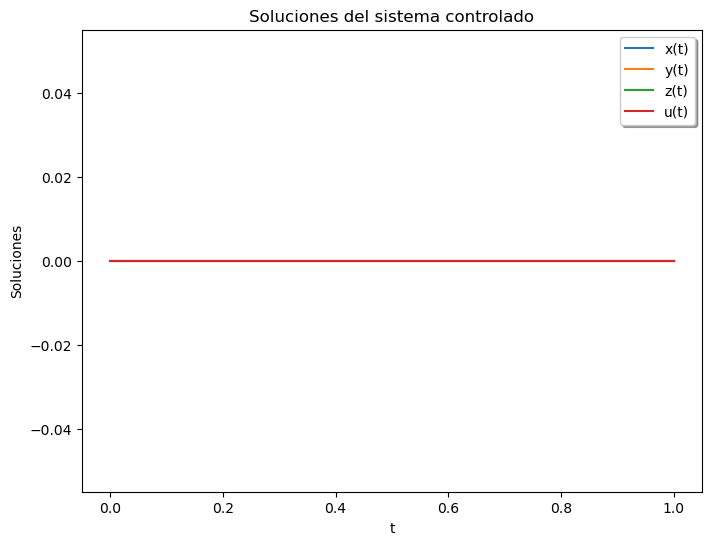

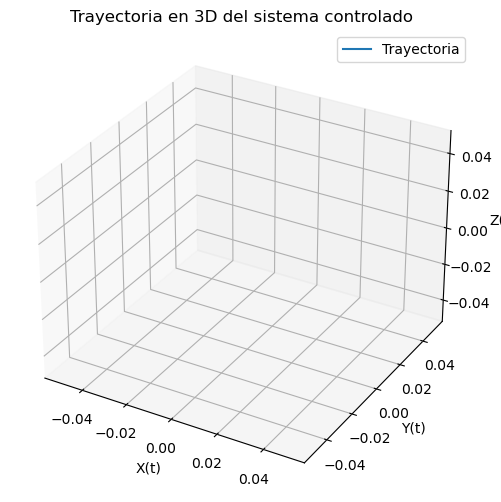

In [11]:
#Soluciones para el control u(t) = 0
grafica_soluciones(diff_sol_u1, u1)
grafica_trayectorias(diff_sol_u1)

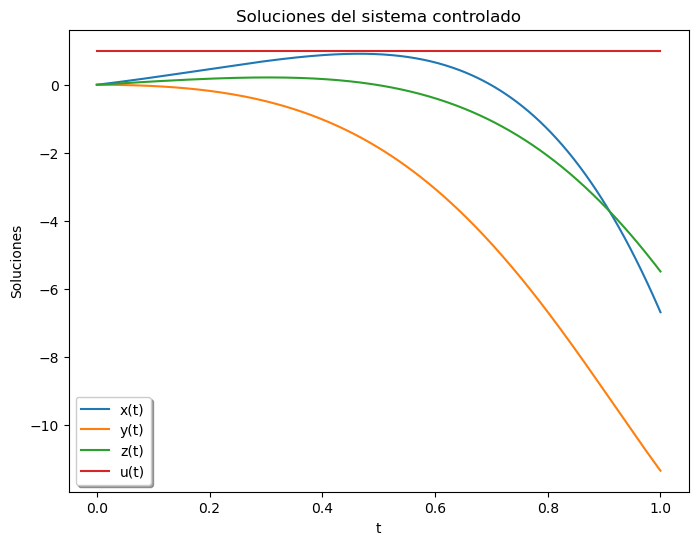

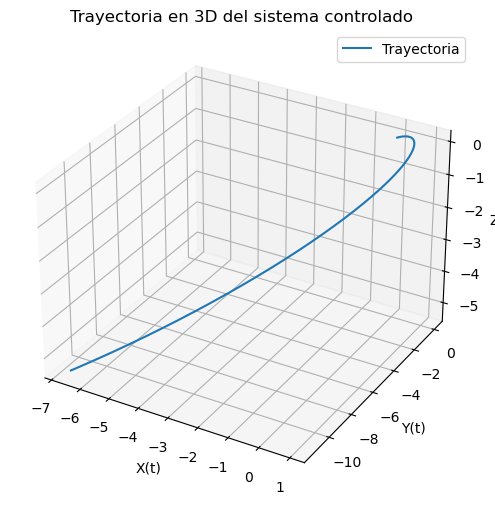

In [12]:
#Soluciones para el control u(t) = 1
grafica_soluciones(diff_sol_u2, u2)
grafica_trayectorias(diff_sol_u2)

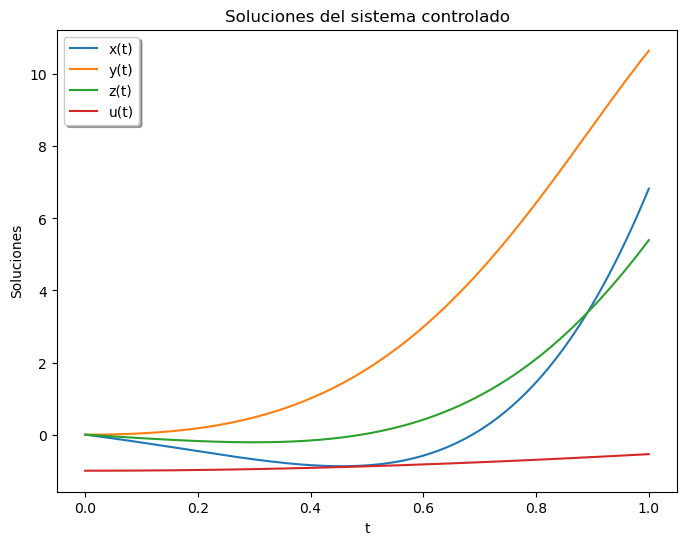

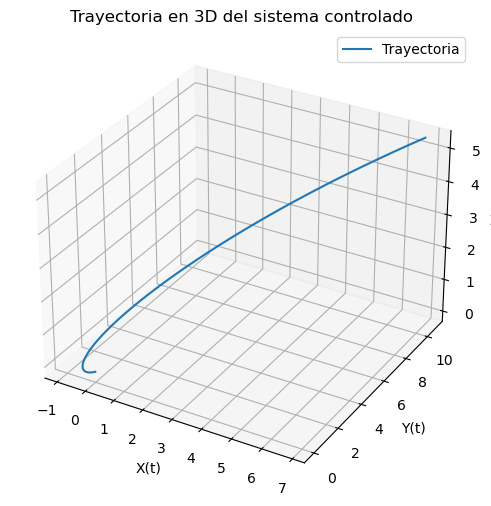

In [13]:
#Soluciones para el control u(t) = -cos(t)
grafica_soluciones(diff_sol_u3, u3_control)
grafica_trayectorias(diff_sol_u3)

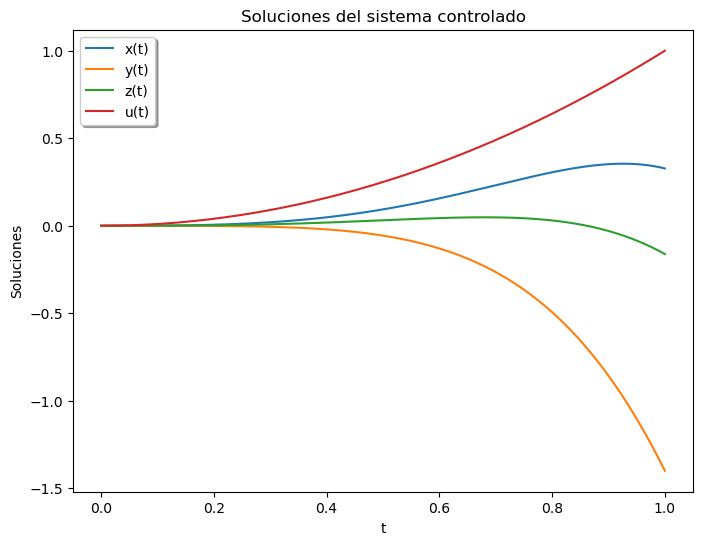

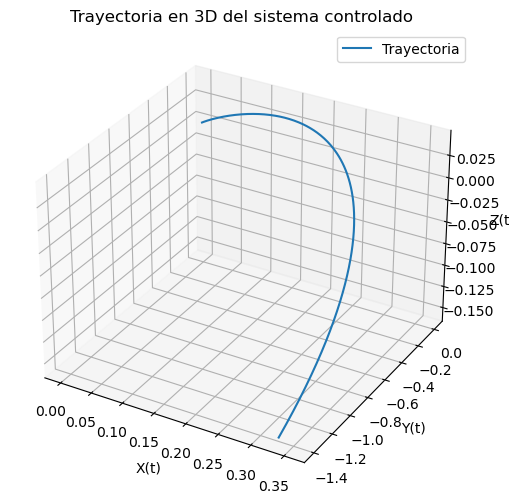

In [14]:
#Soluciones para el control u(t) = t^2
grafica_soluciones(diff_sol_u4, u4_control)
grafica_trayectorias(diff_sol_u4)

### Ejercicio 3 (Optimización lineal)

Ejercicio 3 (Optimización lineal) Resuelver el siguiente problema de programación lineal (PL). 
Utilice para ello linprog de Scipy y se exploran los distintos métodos disponibles.
$$
\left\{\begin{array}{rl}
\min _{(x, y, z) \in \mathbb{R}^3} & f(x, y, z):=-3 x+y-11 z \\
& -x+y-7 z=13 \\
& 3 x-y+2 z \leq 0 \\
\text { sa. } & 2 x+4 z \leq 3 \\
& 2 x-4 y+z \leq 3 \\
& x , y , z \geq 0
\end{array}\right.
$$

Buscamos resolver el problema de programación lineal planteandolo en la forma:
$$
\begin{array}{r}
\min _x c^T x \\
\text { such that } A_{u b} x \leq b_{u b}, \\
A_{e q} x=b_{e q}, \\
l \leq x \leq u,
\end{array}
$$
donde $x$ es la variable de decisión; $c, b_{u b}, b_{e q}, l$, y $u$ son vectores; y $A_{u b}$ , $A_{e q}$ son matrices.

Identificando las variables

$$c^T = [-3 \ \ \ 1 \ -11] , \ A_{eq} = [-1 \ \ \ 1 \ -7], \ \ b_{eq} = 13$$

$$\quad A_{ub}=\left(\begin{array}{ccc}
3 & -1 & 2 \\
2 & 0 & 4 \\
2 & -4 & 1
\end{array}\right), \quad b_{ub}=\left(\begin{array}{l}
0 \\
3 \\
3
\end{array}\right)$$

In [25]:
from scipy.optimize import linprog
#Estructura
#scipy.optimize.1inprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None,
#method='highs', callback=None, options=None, $x \theta=$ None, integrality=None)


In [26]:
# Definimos las matrices y vectores asociadas al sistema
c = [-3, 1, -11]
A_ubPL = [[3, -1, 2], [2, 0, 4], [2, -4, 1]]
b_ubPL =[0, 3, 3]
A_eqPL = [[-1, 1, -7]]
b_eqPL = [13]

# Definimos cotas para las variables
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)

# Resolvemos el problema lineal
res = linprog(c, A_ub=A_ubPL, b_ub=b_ubPL, A_eq = A_eqPL, b_eq = b_eqPL, bounds=[x0_bounds, x1_bounds, x2_bounds])

In [27]:
#Valor óptimo del problema
opt_sol = res.fun
opt_x = res.x
print('El valor óptimo del problema es f(x) = ', opt_sol,'y el óptimo se alcanza en x=', opt_x )

El valor óptimo del problema es f(x) =  10.0 y el óptimo se alcanza en x= [ 1.5 14.5  0. ]


***La función 'linprog' soporta los siguientes métodos:***

***linprog(method=’simplex’)***

***linprog(method=’interior-point’)***

***linprog(method=’revised simplex’)***

***linprog(method=’highs-ipm’)***

***linprog(method=’highs-ds’)***

**linprog(method=’highs’)***



In [28]:
# Método simplex
res_simplex = linprog(c, A_ub=A_ubPL, b_ub=b_ubPL, A_eq = A_eqPL, b_eq = b_eqPL, bounds=[x0_bounds, x1_bounds, x2_bounds], method = 'simplex')
# Valor óptimo del problema
opt_sol_simplex = res_simplex.fun
opt_x_simplex = res_simplex.x
print('El valor óptimo del problema con el método simplex es f(x) = ', opt_sol_simplex,'y el óptimo se alcanza en x=', opt_x_simplex )

El valor óptimo del problema con el método simplex es f(x) =  10.0 y el óptimo se alcanza en x= [ 1.5 14.5  0. ]


C:\Users\Maximiliano\AppData\Local\Temp\ipykernel_9396\1130025907.py:2: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_simplex = linprog(c, A_ub=A_ubPL, b_ub=b_ubPL, A_eq = A_eqPL, b_eq = b_eqPL, bounds=[x0_bounds, x1_bounds, x2_bounds], method = 'simplex')


In [29]:
# Método interior point
res_interior_point = linprog(c, A_ub=A_ubPL, b_ub=b_ubPL, A_eq = A_eqPL, b_eq = b_eqPL, bounds=[x0_bounds, x1_bounds, x2_bounds], method= 'interior-point')
# Valor óptimo del problema
opt_sol_interior_point= res_interior_point.fun
opt_x_interior_point = res_interior_point.x
print('El valor óptimo del problema con el método interior-point es f(x) = ', opt_sol_interior_point,'y el óptimo se alcanza en x=', opt_x_interior_point)

El valor óptimo del problema con el método interior-point es f(x) =  10.000000000006867 y el óptimo se alcanza en x= [ 1.03000962 15.67497595  0.23499519]


C:\Users\Maximiliano\AppData\Local\Temp\ipykernel_9396\1889371418.py:2: DeprecationWarning: `method='interior-point'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_interior_point = linprog(c, A_ub=A_ubPL, b_ub=b_ubPL, A_eq = A_eqPL, b_eq = b_eqPL, bounds=[x0_bounds, x1_bounds, x2_bounds], method= 'interior-point')


In [30]:
# Método revised simplex
res_rev_simplex = linprog(c, A_ub=A_ubPL, b_ub=b_ubPL, A_eq = A_eqPL, b_eq = b_eqPL, bounds=[x0_bounds, x1_bounds, x2_bounds], method = 'revised simplex')
# Valor óptimo del problema
opt_sol_rev_simplex = res_rev_simplex.fun
opt_x_rev_simplex = res_rev_simplex.x
print('El valor óptimo del problema con el método revised simplex es f(x) = ', opt_sol_rev_simplex,'y el óptimo se alcanza en x=', opt_x_rev_simplex )

El valor óptimo del problema con el método revised simplex es f(x) =  10.0 y el óptimo se alcanza en x= [ 0.   18.25  0.75]


C:\Users\Maximiliano\AppData\Local\Temp\ipykernel_9396\3376115678.py:2: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_rev_simplex = linprog(c, A_ub=A_ubPL, b_ub=b_ubPL, A_eq = A_eqPL, b_eq = b_eqPL, bounds=[x0_bounds, x1_bounds, x2_bounds], method = 'revised simplex')


In [31]:
# Método highs-ipm
res_highs_ipm = linprog(c, A_ub=A_ubPL, b_ub=b_ubPL, A_eq = A_eqPL, b_eq = b_eqPL, bounds=[x0_bounds, x1_bounds, x2_bounds], method = 'highs-ipm')
# Valor óptimo del problema
opt_sol_highs_ipm = res_highs_ipm.fun
opt_x_highs_ipm = res_highs_ipm.x
print('El valor óptimo del problema con el método highs-ipm es f(x) = ', opt_sol_highs_ipm,'y el óptimo se alcanza en x=', opt_x_highs_ipm )

El valor óptimo del problema con el método highs-ipm es f(x) =  10.0 y el óptimo se alcanza en x= [ 1.5 14.5  0. ]


**Comentario:** El método ***simplex*** y ***highs-ipm*** alcanzan el óptimo en el mismo punto $x = (1.5 \ \ 14.5 \ \ 0)$, por otro lado **revised simplex** alcanza el mismo valor óptimo $f(x) = 10$ pero en el punto $x = (0 \ \ 18.25 \ \ 0.75)$ y el método de ***interior point*** alcanza un valor levemente mayor en el punto $x= (1.03000962 \ \ 15.67497595 \ \ 0.23499519)$ (puede ser error numérico)

### Ejercicio 4 (Optimización no lineal) 
Una compañía fabrica cajas (paralelepípedos rectangulares) para transporte. 
Se requiere fabricar la caja con el mayor volumen posible,tal que la suma de todas sus aristas no superen los $500 \mathrm{~cm}$ y cuya base no tenga menos de $3000 \mathrm{~cm}^2$ de superficie. 
El problema de optimización asociado, considerando el largo de la base como $x$, el ancho como $y$ y la altura del paralelepípedo como $z$, se plantea como

$$\max V(x,y,z) = xyz \ , \ \ sa \\ 4(x+y+z) \leq 500 \ \ , \ \ xy \geq 3000$$

Pues consideramos que el área de la base se corresponde a la cantidad $xy$, además el paralelepípedo contiene 4 aristas de tamaño $x$,$y$ y $z$, por lo que la suma es $4(x+y+z)$

Notar que $x = [55,55,10]$ es un punto factible

In [32]:
from scipy.optimize import minimize

def objective_function(variables):
    x, y, z = variables
    return -(x * y * z)  # Negativo del volumen para maximizarlo

# Definimos las restricciones, para minimize, 'ineq' se refiere a desigualdad no negativa, i.e, >= 0

def constraint1(variables):
    x, y, z = variables
    return -(4*x + 4*y + 4*z) + 500

def constraint2(variables):
    x, y, z = variables
    return -3000 + x * y 

constraints = [
    {'type': 'ineq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2}
]

# Valores iniciales para x, y, z , elegimos un punto factible
initial_guess = [55, 55, 10]  

result = minimize(objective_function, initial_guess, constraints=constraints, bounds=((0, None), (0, None), (0, None)))

# Dimensiones óptimas
x_optimal, y_optimal, z_optimal = result.x
# Volumen máximo
max_volume = -result.fun

print("Dimensiones óptimas (x, y, z):", x_optimal, y_optimal, z_optimal)
print("Volumen óptimo:", max_volume)


Dimensiones óptimas (x, y, z): 54.772257777997645 54.772257777997645 15.455495672197815
Volumen óptimo: 46366.49044925012


El método anterior entrega un valor factible y posiblemente óptimo del problema, además, cumple con igualdad la restricción $4(x+y+z) \leq 500$, ya que $55+55+15 = 125$, y la restricción  $xy \geq 3000$ pues $54.772*54.772 \approx 3000$

En efecto, notamos que dichas solución es óptima. El problema de maximización de volumen posee solución conocida bajo restricciones del tipo $x+y+z = c$, y dicha solución se alcanza para cuando $x = y = z$, es decir, el volumen máximo de un paralelepípedo se alcanza cuando dicha geometría es un cubo.

Notamos entonces que para cumplir dichas condiciones, debemos asegurar una base cuadrada, es decir, pedir que $x = y = \sqrt(3000)$, y rellenamos con el largo $z$ hasta cumplir la restricción $x+y+z = 125$, pues es en dicha configuración, donde la geometría se acerca más a un cubo.

Concluimos explorando otros métodos de minimización para el problema.

In [33]:
from scipy.optimize import minimize
# Método 'SLSQP' 
# Minimizamos el negativo del volumen
fun = lambda x: - (x[0]*x[1]*x[2])

# Definimos las restricciones, para minimize, 'ineq' se refiere a desigualdad no negativa, i.e, >= 0
cons = ({'type': 'ineq', 'fun': lambda x:  4 * (-x[0] - x[1] - x[2]) + 500},
        {'type': 'ineq', 'fun': lambda x: x[0] * x[1] - 3000})

# Definimos las cotas de las variables
bnds = ((0, None), (0, None), (0, None))

# Iteración inicial, punto factible
x0 = (58, 52, 12)

# Resolvemos el problema de optimización
result = minimize(fun, x0, method='SLSQP', bounds=bnds, constraints=cons)

# Obtener las dimensiones óptimas y el volumen máximo
optimal_dimensions = result.x
max_volume = -result.fun

print("Dimensiones óptimas:", optimal_dimensions)
print("Volumen máximo:", max_volume)

Dimensiones óptimas: [54.7723153  90.01002384 15.45549598]
Volumen máximo: 76196.48242513889


El método 'SLSQP' anterior entrega valores infactibles (posiblemente óptimos cercanos), pues no respeta la condición $x+y+z \leq 125$

In [34]:
# Método 'CG' 
# Minimizamos el negativo del volumen
fun = lambda x: - (x[0]*x[1]*x[2])

# Definimos las restricciones, para minimize, 'ineq' se refiere a desigualdad no negativa, i.e, >= 0
cons = ({'type': 'ineq', 'fun': lambda x:  4 * (-x[0] - x[1] - x[2]) + 500},
        {'type': 'ineq', 'fun': lambda x: x[0] * x[1] - 3000},
       {'type': 'ineq', 'fun': lambda x: x[0]},
       {'type': 'ineq', 'fun': lambda x: x[1]},
       {'type': 'ineq', 'fun': lambda x: x[2]})

# Definimos las cotas de las variables
bnds = ((0, None), (0, None), (0, None))

# Iteración inicial, punto factible
x0 = (58, 52, 12)

# Resolvemos el problema de optimización
result = minimize(fun, x0, method='L-BFGS-B', bounds=bnds, constraints=cons)

# Obtener las dimensiones óptimas y el volumen máximo
optimal_dimensions = result.x
max_volume = -result.fun

print("Dimensiones óptimas:", optimal_dimensions)
print("Volumen máximo:", max_volume)


Dimensiones óptimas: [5.40464501e+94 4.92772772e+94 1.21731057e+94]
Volumen máximo: 0.0


C:\Users\Maximiliano\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:569: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


El método anterior 'L-BFGS-B' entrega valores infactibles (tienden a infinito)

### Ejercicio 5 (solve - Sympy , fsolve - Scipy) 

Encontrar los puntos de intersección $(x, y)$ de las siguientes cónicas:
- $(x-4)^2+3 y^2=20$,
- $x+8(y+1)^2=10$.

a) Utilizando el comando fsolve de scipy.

b) Mediante el comando solve de sympy.

Graficar y comentar los resultados.

In [35]:
# Método fsolve de Scipy
from scipy.optimize import fsolve
# Estructura del método
# scipy.optimize.fsolve(func, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)

def func(x):
    return [(x[0] - 4)**2 + 3*(x[1]**2) - 20,
            x[0] +8*(x[1]+1)**2 - 10]

# Iteración Inicial
x0 = [1,1]
root = fsolve(func, [1, 1])

In [36]:
# Verifica si las soluciones entregadas están cerca del 0
np.isclose(func(root), [0.0, 0.0])

array([ True,  True])

In [37]:
# Soluciones del sistema
print('Las soluciones son x =', root[0], 'e y =', root[1])

Las soluciones son x = -0.46520023110602193 e y = 0.14374386506926


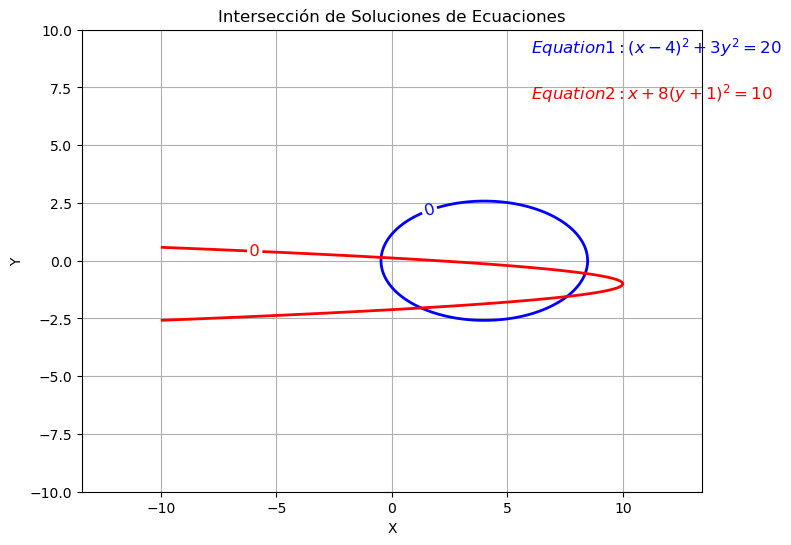

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las ecuaciones a graficar
def equation1(x, y):
    return (x-4)**2 + 3*(y**2) - 20

def equation2(x, y):
    return x + 8*(y+1)**2 - 10

# Generar valores para x y y
x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z1 = equation1(X, Y)
Z2 = equation2(X, Y)

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Graficar las curvas de nivel de ambas ecuaciones
contour1 = plt.contour(X, Y, Z1, levels=[0], colors='blue', linewidths=2)
contour2 = plt.contour(X, Y, Z2, levels=[0], colors='red', linewidths=2)

# Etiquetas para las curvas de nivel
plt.clabel(contour1, inline=1, fontsize=12)
plt.clabel(contour2, inline=1, fontsize=12)

# Mostrar las ecuaciones en etiquetas separadas
equation1_label = r'$Equation1: (x-4)^2 + 3y^2 = 20$'
equation2_label = r'$Equation2: x + 8(y+1)^2 = 10$'

plt.text(6, 9, equation1_label, fontsize=12, color='blue')
plt.text(6, 7, equation2_label, fontsize=12, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Intersección de Soluciones de Ecuaciones')
plt.grid(True)
plt.axis('equal')

# Mostrar la gráfica
plt.show()

In [39]:
print('Las soluciones (x,y) =', (root[0], root[1]), 'son factibles acorde al gráfico.')

Las soluciones (x,y) = (-0.46520023110602193, 0.14374386506926) son factibles acorde al gráfico.


In [40]:
from sympy import symbols, Eq, solve

# Definir las variables simbólicas
x, y = symbols('x y')

# Definir las ecuaciones
equation1 = Eq((x - 4)**2 + 3*(y**2) - 20, 0)
equation2 = Eq(x + 8*(y + 1)**2 - 10, 0)

# Resolver el sistema de ecuaciones
solution = solve((equation1, equation2), (x, y))

print("Solución:", solution)

Solución: [(18 - 8*(-1 + sqrt(31/16 - 2*(122145/2097152 + sqrt(45498189)*I/294912)**(1/3) - 3/(16*sqrt(31/32 + 7747/(24576*(122145/2097152 + sqrt(45498189)*I/294912)**(1/3)) + 2*(122145/2097152 + sqrt(45498189)*I/294912)**(1/3))) - 7747/(24576*(122145/2097152 + sqrt(45498189)*I/294912)**(1/3)))/2 - sqrt(31/32 + 7747/(24576*(122145/2097152 + sqrt(45498189)*I/294912)**(1/3)) + 2*(122145/2097152 + sqrt(45498189)*I/294912)**(1/3))/2)**2 + 8*sqrt(31/32 + 7747/(24576*(122145/2097152 + sqrt(45498189)*I/294912)**(1/3)) + 2*(122145/2097152 + sqrt(45498189)*I/294912)**(1/3)) - 8*sqrt(31/16 - 2*(122145/2097152 + sqrt(45498189)*I/294912)**(1/3) - 3/(16*sqrt(31/32 + 7747/(24576*(122145/2097152 + sqrt(45498189)*I/294912)**(1/3)) + 2*(122145/2097152 + sqrt(45498189)*I/294912)**(1/3))) - 7747/(24576*(122145/2097152 + sqrt(45498189)*I/294912)**(1/3))), -1 + sqrt(31/16 - 2*(122145/2097152 + sqrt(45498189)*I/294912)**(1/3) - 3/(16*sqrt(31/32 + 7747/(24576*(122145/2097152 + sqrt(45498189)*I/294912)**(1/3)

Notamos que el método ***solve*** no entrega una solución explícita, procedemos a utilizar el método ***nsolve*** de ***Sympy***

In [41]:
from sympy import Symbol, nsolve
import mpmath

mpmath.mp.dps = 15

x = Symbol('x')

y = Symbol('y')

f1 = (x - 4)**2 + 3*(y**2) - 20

f2 = x + 8*(y + 1)**2 - 10

print(nsolve((f1, f2), (x, y), (-1, 1)))

Matrix([[-0.465200231094194], [0.143743865070661]])


Vemos que el método ***nsolve*** resuelve de forma explícita el sistema de ecuaciones, y la solución que entrega coincide con la solución dada por la librería ***Scipy***